In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skbio
from scipy.cluster import hierarchy

from qiime2 import Artifact

In [2]:
matrix = Artifact.load('../input_data/matrix/weighted_unifrac_distance_matrix.qza')

In [3]:
metadata = pd.read_csv('../input_data/metadata.txt', sep='\t', index_col=0)
metadata['Sample type'] = metadata['Type'] + '-' + metadata['Location']
metadata

,Location,Type,Sample type
Sample Id,,,
ENVGutDigesta1,Digesta,ENV,ENV-Digesta
ENVGutDigesta2,Digesta,ENV,ENV-Digesta
ENVGutDigesta3,Digesta,ENV,ENV-Digesta
ENVGutTissue1,Tissue,ENV,ENV-Tissue
ENVGutTissue2,Tissue,ENV,ENV-Tissue
ENVGutTissue3,Tissue,ENV,ENV-Tissue
LabGutDigesta1,Digesta,LAB,LAB-Digesta
LabGutDigesta2,Digesta,LAB,LAB-Digesta
LabGutDigesta3,Digesta,LAB,LAB-Digesta


In [4]:
type2color = dict(zip(metadata['Sample type'].unique(),'rgbk'))
type2shape = dict(zip(metadata['Sample type'].unique(),'os^v'))

In [5]:
uni_shape = [u'\u25CF',u'\u25FC',u'\u25B2',u'\u25BC']
print(uni_shape)
shape2unishape = dict(zip('os^v',uni_shape ))

['●', '◼', '▲', '▼']


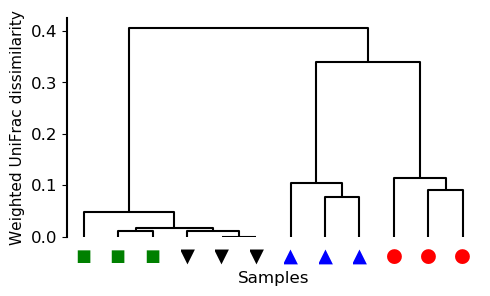

In [14]:
dis_matrix = matrix.view(skbio.DistanceMatrix)

Z = hierarchy.linkage(dis_matrix.condensed_form(), 'average')

plt.style.use('default')
fig, ax = plt.subplots(figsize=(5,3))
dn = hierarchy.dendrogram(Z,labels=metadata.index, above_threshold_color='k',
                          color_threshold=0)


shapes = []
for xtick in ax.get_xticklabels():
    xtick_label = xtick.get_text()
    t = metadata.loc[xtick_label,'Sample type']
    
    marker_color = type2color[t]
    xtick.set_color(marker_color)
    
    marker_shape = type2shape[t]
    shape = shape2unishape[marker_shape]
    shapes.append(shape)
    
ax.set_xticklabels(shapes)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)    
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
# ax.tick_params('y', colors='k')

plt.xlabel('Samples', fontsize=12)
plt.ylabel('Weighted UniFrac dissimilarity', fontsize=11, weight='medium')
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('../figures/dendrogram-wt-unifrac.png', dpi=600)
plt.show()